In [28]:
# import all the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Problem 1

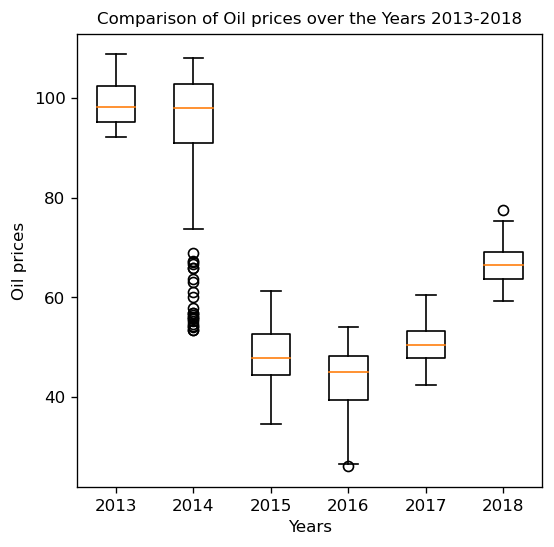

In [29]:
### Oil price data loading and preprocessing
df = pd.read_csv('/Users/preshitadave/Documents/Boston related/BU/Courses/BF550/Week4/Week 4 files/oil_price.csv', parse_dates=['DATE'],index_col=['DATE'])

# On observing the data file, there is a presence of missing data represented by dots. 
# Since we won't be able to plot them, let us replace them with NaN values
df['DCOILWTICO']=df['DCOILWTICO'].replace('.', np.NaN)
# Drop the nan values
df = df.dropna()

# Since the oil prices in column DCOILWTICO are represented in the str format, we need to convert it to float to plot it on the map 
df = df.astype(float)

years ={}
# Adding the data to a dictionary. Grouping by the different years as a key, the values contain a list of all the oil prices
for i in df.index.year.unique():
    years[i] = df['DCOILWTICO'].loc[df.index.year==i].tolist()
    
# Creating a boxplot which show the distribution of data over a specific year. This helps us to compare the prices of oil over different years

fig, ax = plt.subplots(figsize=(5, 5), dpi= 120) # figure dimensions

values = ax.boxplot(years.values()) 
ax.set_xticklabels(years.keys(), fontsize = 10);
ax.set_xlabel('Years', fontsize = 10)
ax.set_ylabel('Oil prices', fontsize = 10)
ax.set_title('Comparison of Oil prices over the Years 2013-2018', fontsize = 10)
plt.show()


# Problem 2

In [30]:
# Open the file to be used to read the data
with open('/Users/preshitadave/Documents/Boston related/BU/Courses/BF550/HW/HW2/v13_map_uniquebyPSN.txt','rt') as f:
    data = f.read()

#split by newline
nl_split=data.split('\n')

#split by tab
tab_split = [st.split('\t') for st in nl_split]
tab_split = tab_split[1:]

# creating a dictionary for total patients and their body site collections
total_data ={}
for i in tab_split:
    if i[5] not in total_data.keys():
        total_data[i[5]] = 1
    elif i[5] in total_data.keys():
        total_data[i[5]] += 1

#going through the nested lists to create separate dictionaries for male and female body site collections
total_data_male = dict.fromkeys(total_data.keys(),0)
total_data_female = dict.fromkeys(total_data.keys(),0)
for i in tab_split:
    if i[5] not in total_data_male.keys() and i[3] =='male':
        total_data_male[i[5]] = 1
    elif i[5] in total_data_male.keys() and i[3] =='male':
        total_data_male[i[5]] += 1
    elif i[5] not in total_data_female.keys() and i[3] =='female':
        total_data_female[i[5]] = 1
    elif i[5] in total_data_female.keys() and i[3] =='female':
        total_data_female[i[5]] += 1  
    

# Let the plotting begin!
labels = list(total_data.keys()) # creating the list of labels needed to be plotted on the X-Axis
width = 0.25 # width of each bar

# Set position of bar on X axis
x1 = np.arange(len(labels))
x2 = [i+width for i in x1]
x3 = [i+width for i in x2]

#Size of figure
plt.rcParams['figure.figsize'] = [20, 5] # [x,y]
plt.figure(dpi=800)

# Make the plot
total = plt.bar(x1,list(total_data.values()), width, label = 'Complete population', color = 'orange')
female = plt.bar(x2,list(total_data_female.values()), width, label='Female', color = 'purple')
male = plt.bar(x3,list(total_data_male.values()), width, label='Male', color = 'skyblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Number of samples', fontsize = 10, fontweight='bold')
plt.title('Number of samples by body site collection and gender', fontsize = 15, fontweight='bold')
plt.xticks([r + width for r in range(len(labels))],labels, rotation =30, horizontalalignment='right', fontsize = 10, fontweight='bold')
plt.legend()
plt.legend(loc='upper right')
plt.show()

In [17]:
'''
WITH PANDAS FOR PREPARING THE DATA TO BE PLOTTED  
'''

# loading and preprocessing the data
df = pd.read_csv('v13_map_uniquebyPSN.txt', sep='\t')
df = df.iloc[:,:-4]

# total body sites and the count of their samples for Part 1 
body_sites = df['HMPbodysubsite'].value_counts()


# Creating 2 different dataframes which have males and females separately
female_df = df[df['sex']=='female']
male_df = df[df['sex']=='male']

# body site samples for females
female_samples = female_df['HMPbodysubsite'].value_counts()
# body site samples for males
male_samples = male_df['HMPbodysubsite'].value_counts()


# concatenating all three series, total, male and female into one df for easier use of plotting 
final = pd.concat([body_sites, female_samples,male_samples], keys=['Complete_list', 'Female','Male'], axis=1)


# Let the plotting begin!
labels = list(final.index)
width = 0.25 # width of each bar

# Set position of bar on X axis
x1 = np.arange(len(labels))
x2 = [i+width for i in x1]
x3 = [i+width for i in x2]

#Size of figure
plt.rcParams['figure.figsize'] = [20, 5] # [x,y]
plt.figure(dpi=800)
# Make the plot
total = plt.bar(x1,final['Complete_list'], width, label = 'Complete population', color = 'orange')
female = plt.bar(x2,final['Female'], width, label='Female', color = 'purple')
male = plt.bar(x3,final['Male'], width, label='Male', color = 'skyblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Number of samples', fontsize = 13, fontweight='bold')
plt.title('Number of samples by body site collection and gender', fontsize = 13, fontweight='bold')
plt.xticks([r + width for r in range(len(labels))],labels, rotation =30, horizontalalignment='right', fontsize = 10, fontweight='bold')
plt.legend()
plt.legend(loc='upper right')
plt.show()

# Problem 3

In [25]:
# parsing the genome fasta file 
seq_info = {} # store the data into a dictionary with the identifier as a key, and the sequence as the value
with open('/Users/preshitadave/Documents/Boston related/BU/Courses/BF550/Week3/ecoli_genome(1).fasta','rt') as f:
    for line in f:
        stripped_line = line.rstrip('\n') # remove the newline character at the end of the line
        if stripped_line.startswith('>'): # check if first line is fasta ID or not, if yes, enter block of code indented
            seq_key = stripped_line.split()[0][1:] # acts as key or identifier for the sequence below 
            seq = '' # empty str to store sequence 
        else:
            seq = seq+stripped_line #add onto the existing sequence of the same ID
        seq_info[seq_key] = seq #update dictionary with information on ID and sequence
f.close() # close the file

"""
Creation of an abstract class which can be inherited by other classes
"""
class base_walker: 
    def __init__(self): #constructor
        pass
    def one_step(self): #process for one step 
        pass
    def steps(self,n,pos): # process for multiple steps calls method one_step(). n = number of steps in a walk, pos indicates the position to start from
        for i in range(pos,pos+n):
            self.one_step(seq_info['NC_000913.3'][i])

            
"""
This class inherits from base_walker and adapts the process as required. It takes the input of the number of steps 
and the number of walks to be completed. The position starts from 0 and next walk starts from where the previous 
walk ended. Taking in the genomic sequence, an 'A' or 'T' is a step in the +1 direction, whereas a 'G' or 'C' is 
a step in the -1 direction. 
"""           
class random_walker(base_walker):
    def __init__(self):
        # define stored variables, initial data
        self.x = 0
        self.walk = [self.x] # stores all the positions in a list 
    def one_step(self,char):
        # increment the current position by +1 or -1
        if char == 'A' or char == 'T':
            self.x += 1
        elif char =='G' or char =='C':
            self.x -= 1
        self.walk.append(self.x)
        
    def get_walk(self):
        # return the history of the position of the walker
        return self.walk



### PART 1
num_walks = 3 # perform random walk 3 times

total_positions = [] # will contain positions of all 3 walks
label = [] # for creating the legend

for i in range(num_walks): 
    walker = random_walker() # creating an object of the random_walker class
    walker.steps(100,i*100)  # give input as number of steps and starting position of the walk
    walk = walker.get_walk() # returns the entire walk as a list 
    total_positions.append(walk) # nested list of all walks
    label.append('random walk ' + str(i+1)) # add 1 so the first walk is walk 1 and not 0


plt.rcParams['figure.figsize'] = [20, 10] # [x,y]
plt.figure(dpi=1200)
plt.subplot(1, 2, 1) #subplot 1

for walk in total_positions: # plot each walk as a separate line on the plot
    plt.plot(walk)

plt.xlabel('Time', fontweight='bold', fontsize=13)
plt.ylabel('Position', fontweight='bold', fontsize=13)
plt.title('Random walk', fontweight='bold', fontsize=15)
plt.legend(labels=label,loc = 'upper left', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)


### PART 2
num_walks = 200 # perform random walk 200 times

total_displacements = [] # will contain positions of all 200 walks
label = [] # for creating the legend

for i in range(num_walks): # perform 200 walks
    walker = random_walker() # creating an object of the random_walker class
    walker.steps(100,i*100) # give input as number of steps and starting position of the walk
    walk = walker.get_walk() # returns the entire walk as a list 
    total_displacements.append(walk[-1]) # we only require the displacement, which is the final score
    label.append('walk ' + str(i+1)) # add 1 so the first walk is walk 1 and not 0
    
# probability density function
plt.subplot(1, 2, 2)

n, bins, patches = plt.hist(total_displacements, 50, density=True, facecolor='purple', alpha=0.75, edgecolor = 'black')
plt.xlabel('Displacement', fontweight='bold', fontsize=12)
plt.ylabel('Frequency', fontweight='bold', fontsize=12)
plt.title('Frequency of displacement of one over 200 walks', fontweight='bold', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout(pad=3.0)

plt.show()
